In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from pandas import Series, DataFrame
import numpy.random as rnd
import scipy.stats as st
import os

In [3]:
nvalues = 10
norm_variates = rnd.randn(nvalues)
norm_variates

array([-1.33606149, -0.28635903, -0.01630538,  0.01912335, -1.04224888,
       -2.35848109, -0.27388712, -0.28914203,  1.09079143, -0.67079987])

In [6]:
for i, v in enumerate(sorted(norm_variates), start=1):
    print('{0:2d} {1:.4f}'.format(i, v))

 1 -2.3585
 2 -1.3361
 3 -1.0422
 4 -0.6708
 5 -0.2891
 6 -0.2864
 7 -0.2739
 8 -0.0163
 9 0.0191
10 1.0908


[0.5, 5, 0, 3]

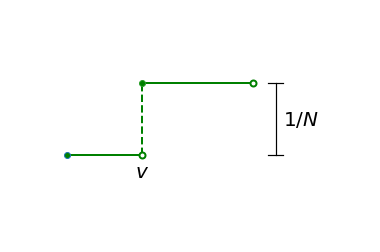

In [10]:
plt.figure()
ax = plt.gca()
ax.axis('off')
plt.plot([1,2],[1,1],lw=2, color='green')
plt.plot([2,2], [1,2], lw=2, color='green', ls='--')
plt.plot([2, 3.5], [2,2], lw=2, color='green')
plt.plot(1,1, marker='o', mfc='green')
plt.plot(2,1, marker='o', mfc='white', mec='green', mew=2)
plt.plot(2,2, marker='o', mfc='green')
plt.plot(3.5,2, marker='o', mfc='white', mec='green', mew=2)
plt.text(2.0, 0.9, '$v$', fontsize=20, horizontalalignment='center', verticalalignment='top')
xx = 3.8
delta = 0.1
plt.plot([xx, xx],[1,2], lw=1.2, color='black')
plt.plot([xx-delta,xx+delta],[1,1],lw=1.2, color='black')
plt.plot([xx-delta, xx+delta], [2,2], lw=1.2, color='black')
plt.text(xx+delta, 1.5, '$1/N$', fontsize=20, horizontalalignment='left', verticalalignment='center')
plt.axis([0.5,5,0,3])

In [11]:
def plot_cdf(data, plot_range=None, scale_to=None, **kwargs):
    num_bins = len(data)
    sorted_data = np.array(sorted(data), dtype=np.float64)
    data_range = sorted_data[-1] - sorted_data[0]
    counts, bin_edges = np.histogram(sorted_data, bins=num_bins)
    xvalues = bin_edges[1:]
    yvalues = np.cumsum(counts)
    if plot_range is None:
        xmin = xvalues[0]
        xmax = xvalues[-1]
    else:
        xmin, xmax = plot_range
    xvalues = np.concatenate([[xmin, xvalues[0]], xvalues, [xmax]])
    yvalues = np.concatenate([[0.0,0.0], yvalues, [yvalues.max()]])
    if scale_to:
        yvalues = yvalues / len(data) *scale_to
    plt.axis([xmin, xmax, 0, yvalues.max()])
    return plt.step(xvalues, yvalues, **kwargs)


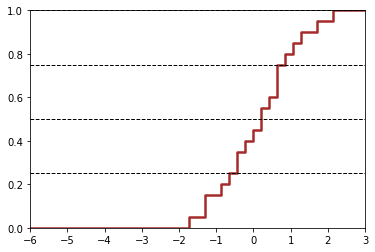

In [12]:
nvalues = 20
norm_variates = rnd.randn(nvalues)
axes = plot_cdf(norm_variates, plot_range=[-6, 3], scale_to=1., lw=2.5, color='Brown')
for v in [0.25, 0.5, 0.75, 1.0]:
    plt.axhline(v, lw=1, ls='--', color='black')

In [13]:
wing_lengths = np.fromfile('data/housefly-wing-lengths.txt', sep='\n', dtype=np.int64)
wing_lengths

array([36, 37, 38, 38, 39, 39, 40, 40, 40, 40, 41, 41, 41, 41, 41, 41, 42,
       42, 42, 42, 42, 42, 42, 43, 43, 43, 43, 43, 43, 43, 43, 44, 44, 44,
       44, 44, 44, 44, 44, 44, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 46,
       46, 46, 46, 46, 46, 46, 46, 46, 46, 47, 47, 47, 47, 47, 47, 47, 47,
       47, 48, 48, 48, 48, 48, 48, 48, 48, 49, 49, 49, 49, 49, 49, 49, 50,
       50, 50, 50, 50, 50, 51, 51, 51, 51, 52, 52, 53, 53, 54, 55])

Text(0,0.5,'Percent')

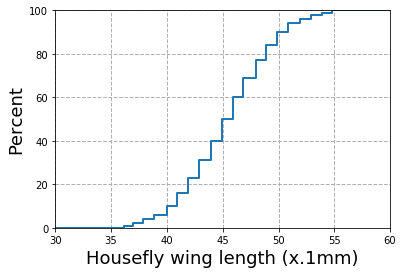

In [14]:
plot_cdf(wing_lengths, plot_range=[30, 60], scale_to=100, lw=2)
plt.grid(lw=1, ls='dashed')
plt.xlabel('Housefly wing length (x.1mm)', fontsize=18)
plt.ylabel('Percent', fontsize=18)

In [15]:
import scipy.stats as st


In [16]:
N = 4857
mean = 63.8
serror = 0.06
sdev = serror * np.sqrt(N)
rvnorm = st.norm(loc=mean, scale=sdev)

[51.255407539501334, 76.34459246049866, 0.0, 0.1]

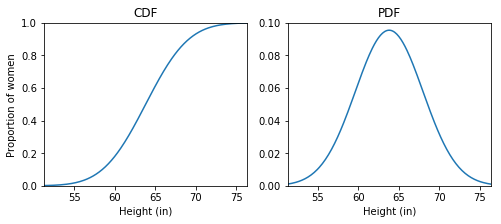

In [17]:
xmin = mean -3*sdev
xmax = mean + 3*sdev
xx = np.linspace(xmin, xmax, 200)
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(xx, rvnorm.cdf(xx))
plt.title('CDF')
plt.xlabel('Height (in)')
plt.ylabel('Proportion of women')
plt.axis([xmin, xmax, 0.0, 1.0])
plt.subplot(1,2,2)
plt.plot(xx, rvnorm.pdf(xx))
plt.title('PDF')
plt.xlabel('Height (in)')
plt.axis([xmin, xmax, 0.0, 0.1])

In [18]:
rvnorm.cdf(68)

0.8424111333807798

In [19]:
rvnorm.cdf(63)

0.4241384277767544

In [21]:
100*(rvnorm.cdf(68)-rvnorm.cdf(63))

41.82727056040253

In [22]:
st.rv_continuous.fit

<function scipy.stats._distn_infrastructure.rv_continuous.fit>

In [23]:
categories = [('Petite', 59, 63), ('Average', 63, 68), ('Tail', 68, 71)]
for cat, vmin, vmax in categories:
    percent = 100*(rvnorm.cdf(vmax)-rvnorm.cdf(vmin))
    print('{0:>8s}: {1:.2f}'.format(cat, percent))

  Petite: 29.86
 Average: 41.83
    Tail: 11.50


In [25]:
too_short = 100*rvnorm.cdf(59)
too_tall = 100*(1-rvnorm.cdf(71))
unclassified = too_short + too_tall
print(too_short, too_tall, unclassified)

12.55038986608284 4.254767214713451 16.805157080796292


In [26]:
a = rvnorm.ppf(0.25)
b = rvnorm.ppf(0.75)
print(a, b)

60.97960032166886 66.62039967833113


In [27]:
mean, variance, skew, kurtosis = rvnorm.stats(moments='mvks')
print(mean, variance, skew, kurtosis)

63.8 17.485200000000003 0.0 0.0


In [28]:
eta = 1.0
beta = 1.5
rvweib = st.weibull_min(beta, scale=eta)

Text(0.5,0,'Height (in)')

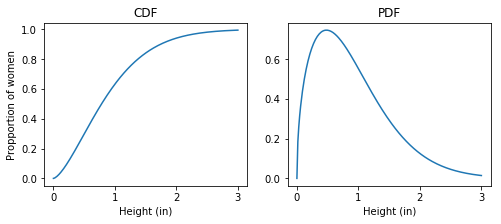

In [29]:
xmin = 0
xmax = 3
xx = np.linspace(xmin, xmax, 200)
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(xx, rvweib.cdf(xx))
plt.title('CDF')
plt.xlabel('Height (in)')
plt.ylabel('Propportion of women')
plt.subplot(1,2,2)
plt.plot(xx, rvweib.pdf(xx))
plt.title('PDF')
plt.xlabel('Height (in)')

In [31]:
weib_variates = rvweib.rvs(size=500)
print(weib_variates[:10])

[0.56195973 0.77178668 1.55313289 1.40488987 0.81619753 0.49297884
 1.31547238 1.57053143 0.42576517 0.03502019]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9640814c50>]],
      dtype=object)

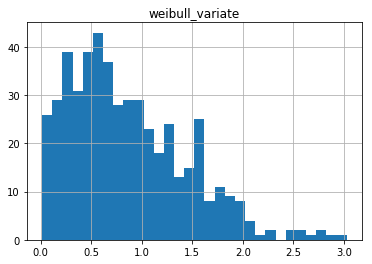

In [32]:
weib_df = DataFrame(weib_variates, columns=['weibull_variate'])
weib_df.hist(bins=30)

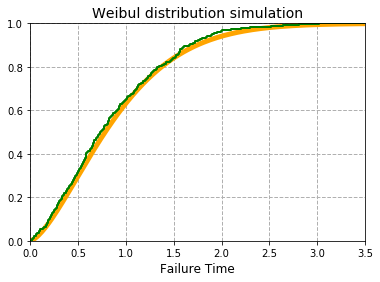

In [33]:
xmin = 0
xmax = 3.5
xx = np.linspace(xmin, xmax, 200)
plt.plot(xx, rvweib.cdf(xx), color='orange', lw=5)
plot_cdf(weib_variates, plot_range=[xmin, xmax], scale_to=1, lw=2, color='green')
plt.axis([xmin, xmax, 0, 1])
plt.title('Weibul distribution simulation', fontsize=14)
plt.xlabel('Failure Time', fontsize=12)
plt.grid(lw=1, ls='dashed')

In [34]:
wing_lengths = np.fromfile('data/housefly-wing-lengths.txt', sep='\n', dtype=np.int64)
mean, std = st.norm.fit(wing_lengths)
print(mean, std)

45.5 3.9


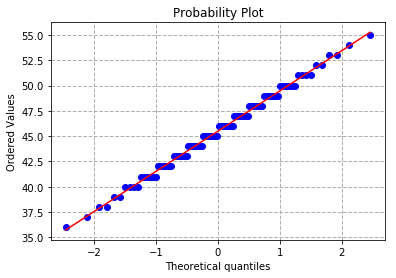

In [35]:
st.probplot(wing_lengths, dist='norm', plot=plt)
plt.grid(lw=1, ls='dashed')

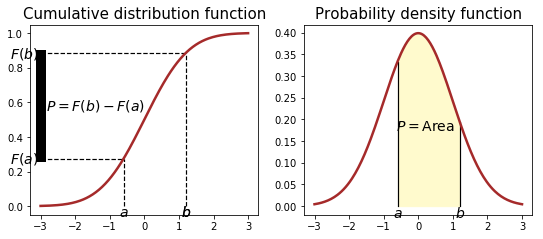

In [39]:
mean = 0.0
sdev = 1.0
rvnorm = st.norm(loc=mean, scale=sdev)
cdf = rvnorm.cdf
pdf = rvnorm.pdf
a = -.6
b = 1.2
xmin = mean-3*sdev
xmax = mean+3*sdev
xx = np.linspace(xmin, xmax, 200)
plt.figure(figsize=(9, 3.5))
yy = cdf(xx)
plt.subplot(1,2,1)
plt.title('Cumulative distribution function',fontsize=15)
plt.plot([a,a], [0.0, cdf(a)], lw=1.2, ls='--', color='black')
plt.plot([b,b], [0.0, cdf(b)], lw=1.2, ls='--', color='black')
plt.plot([xmin, a], [cdf(a), cdf(a)], lw=1.2, ls='--', color='black')
plt.plot([xmin, b], [cdf(b), cdf(b)], lw=1.2, ls='--', color='black')
plt.plot(xx, yy, color='Brown', lw=2.5)
plt.plot([xmin, xmin], [cdf(a)+0.01, cdf(b)-0.015], lw=10, color='black')
plt.text(a, -0.06, '$a$', fontsize=14, horizontalalignment='center')
plt.text(b, -0.06, '$b$', fontsize=14, horizontalalignment='center')
plt.text(xmin-0.06, cdf(a), '$F(a)$', fontsize=14, horizontalalignment='right', verticalalignment='center')
plt.text(xmin-0.06, cdf(b), '$F(b)$', fontsize=14, horizontalalignment='right', verticalalignment='center')
plt.text(b, -0.06, '$b$', fontsize=14, horizontalalignment='center')
plt.text(xmin+0.15, 0.5*(cdf(a)+cdf(b)), '$P=F(b)-F(a)$', fontsize=14, verticalalignment='center')
yy = pdf(xx)
plt.subplot(1,2,2)
plt.title('Probability density function', fontsize=15)
plt.plot([a,a], [0.0, pdf(a)], lw=1.2, color='black')
plt.plot([b,b], [0.0, pdf(b)], lw=1.2, color='black')
plt.fill_between(xx, yy, where=(a<=xx)&(xx<=b), color='LemonChiffon')
plt.text(a, -0.025, '$a$', fontsize=14, horizontalalignment='center')
plt.text(b, -0.025, '$b$', fontsize=14, horizontalalignment='center')
plt.text(0.5*(a+b)-.1, 0.2, '$P=$Area', fontsize=14, horizontalalignment='center', verticalalignment='top')
plt.plot(xx, yy, color='Brown', lw=2.5)

In [40]:
N = 20
p = 0.5
rv_binom = st.binom(N, p)

In [41]:
rv_binom.pmf(12)

0.12013435363769531

In [42]:
rv_binom.cdf(7)

0.13158798217773435

[0, 20, 0, 0.18]

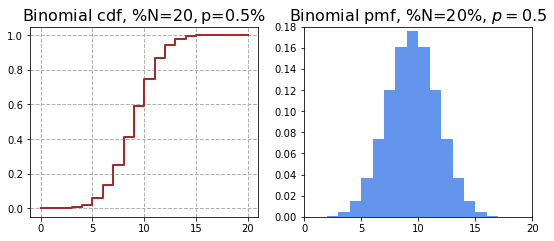

In [43]:
xx = np.arange(N+1)
cdf = rv_binom.cdf(xx)
pmf = rv_binom.pmf(xx)
xvalues = np.arange(N+1)
plt.figure(figsize=(9, 3.5))
plt.subplot(1,2,1)
plt.step(xvalues, cdf, lw=2, color='brown')
plt.grid(lw=1, ls='dashed')
plt.title('Binomial cdf, %N=20$, $p=0.5%', fontsize=16)
plt.subplot(1,2,2)
left = xx - 0.5
plt.bar(left, pmf, 1.0, color='CornflowerBlue')
plt.title('Binomial pmf, %N=20%, $p=0.5$', fontsize=16)
plt.axis([0, 20, 0, .18])

In [44]:
mean = rv_binom.mean()
std = rv_binom.std()
print(mean, std)

10.0 2.23606797749979


In [45]:
mean = N*p
std = np.sqrt(N*p*(1-p))
print(mean, std)

10.0 2.23606797749979


[0, 20, 0, 0.18]

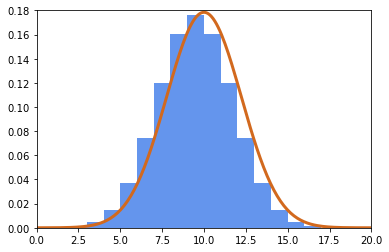

In [48]:
rvnorm = st.norm(loc=mean, scale=std)
pdf = rvnorm.pdf
xx = np.linspace(0, 20, 200)
yy = pdf(xx)
plt.plot(xx, yy, lw=3, color='Chocolate')
xx = np.arange(N+1)
pmf = rv_binom.pmf(xx)
left = xx - 0.5
plt.bar(left, pmf, 1.0, color='CornflowerBlue')
rvnorm = st.norm(loc=mean, scale=std)
plt.axis([0, 20, 0, .18])

In [49]:
import scipy.stats as st
binorm_variates = st.multivariate_normal.rvs(mean=[0,0], size=300)
df = DataFrame(binorm_variates, columns=['Z1', 'Z2'])
df.head(10)

,Z1,Z2
0,0.058451,-0.428488
1,3.527689,0.597747
2,-0.119858,-0.719185
3,-0.527824,-1.005483
4,-1.239065,-1.706592
5,-1.120070,1.010416
6,2.569776,1.071497
7,0.313095,-0.209351
8,-0.957976,0.848359
9,2.470613,-0.163228


In [ ]:
df.plot